# First, run the cell below to load the libraries...

In [1]:
import osiris
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
plt.rc('font',size=20,family="serif")
%matplotlib inline

# Two-stream instability with UPIC-ES

##  F. S. Tsung & K. Miller

A two-stream instability occurs when two species (either the same or different) in a plasma have equal but opposite drift velocities $v_0$ different drift velocities. Depending on the physical parameters, modes can then arise which are unstable and grow exponentially. 

To begin, we derive the general dispersion relation for these instabilities for two different (but not necessarily identical) species with 2 different drift velocities.


## General dispersion relation notebook

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

\begin{equation}
1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. 
\end{equation}

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. So now let us consider the case where the two species are identical and 

### Two-stream instability

If the two species in question are simply counter-propagating electron beams of speed $\vec{v}_0$ with no temperature, then we can rewrite the above dispersion as $v_{0,1}=v_{0,2}=v_0$, $\omega_{p,1}=\omega_{p,2}= \omega_{pe}$:

defining $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$ gives a dispersion relation of

$$ 1=\frac{1}{(x - \alpha)^2}+\frac{1}{(x+\alpha)^2}. $$

Solving the dispersion relation yields

$$ x^2 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2}, \\
\alpha \gg 1 \Rightarrow x \approx \alpha \pm 1. $$

However, we desire imaginary $\omega$ to have a growing mode, so solving for when $x=0$ gives

$$ 0 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2},\\
\Rightarrow \alpha\leq\sqrt{2}. $$

The fastest-growing mode occurs when $\frac{dx}{d\alpha}=0$, or $\alpha=\sqrt{3}/2 \approx 0.85 (\approx 1)$. The dispersion relation is plotted in the following figure.  The resonance condition, or the value for the most unstable mode number is therefore

\begin{equation}
k_{max} = 0.85 \frac{\omega_p}{v_0}
\end{equation}

From the above equation, one can see that the growth rate follows a universal curve in units of $\alpha$ and $\omega/\omega_{pe} \equiv x$.  For the rest of the notebook, we will discuss the system in these units, but first we will briefly go over the units of the simulation code UPIC-ES

<img src="two_real.png">

## Case 0/Prelude:  Two streams with the same velocity ($v0=3 \Delta x \omega_{pe}$)

In this case, there is no instability.  The dispersion relation is simply Doppler shifted plasma waves, i.e., $\omega_{\pm} = \pm \sqrt{2}\omega_{pe} + k v_0$, where the factor of $\sqrt{2}$ comes from the fact that there are two cold beams.

In [3]:
dirname = 'onestream'
osiris.run_upic_es(rundir=dirname,inputfile='1stream.txt')

combine_h5_2d completed normally
runbeps completed normally


Running with only one species at the same drift velocity results in a simple shift of the electron-plasma wave dispersion, $ \omega^2 = \omega_p^2 + 3 v_{the}^2 k^2 $, or $\omega = \pm \omega_p$ by $\vec{k}\cdot\vec{v}_0$.

###### Below is the simulation results from the one stream case, it should just be the Doppler shifted Bohm Gross, or in our case (due to the low temperature), a straight line with slope v0



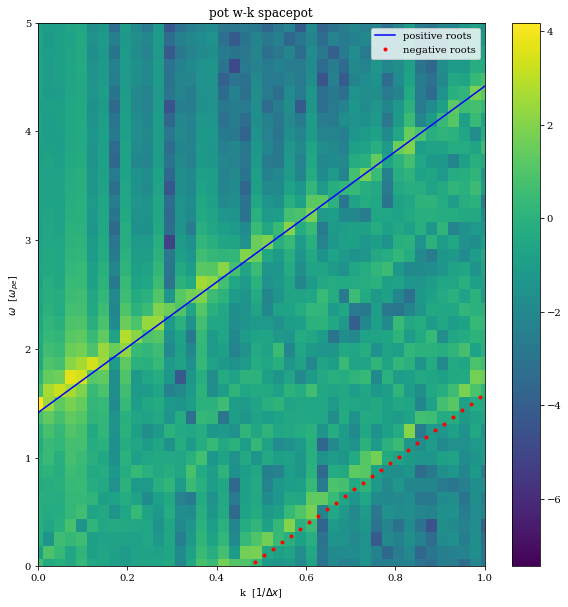

In [4]:
dirname = 'onestream'

v0=3
nk=100
k_array=np.linspace(0,2,num=nk)
omega_plus=np.zeros(nk)
omega_minus=np.zeros(nk)
# plt.figure(figsize=(10,10))
for ik in range(0,nk):
    omega_minus[ik]=-np.sqrt(2)+v0*k_array[ik]
    omega_plus[ik]=np.sqrt(2)+v0*k_array[ik]
    

osiris.plot_wk_arb(rundir=dirname, field='pot',TITLE='pot',wlim=5, klim=1,plot_show=False)
plt.plot(k_array,omega_plus,'b-',label='positive roots')
plt.plot(k_array,omega_minus,'r.',label='negative roots')
plt.legend()
plt.show()

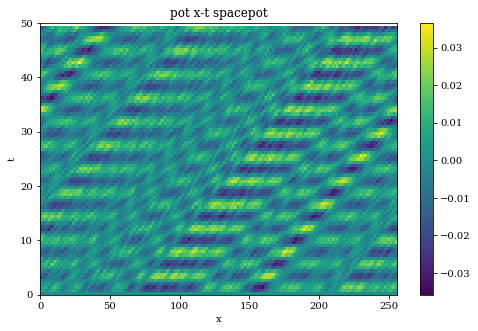

In [2]:
dirname = 'onestream'

osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,50])

In [ ]:
dirname='onestream'

osiris.phaseinteract_upic(rundir=dirname)

Below are 3 different cases of the two stream instability using the electrostatic code UPIC-ES.   The normalization of the code is
$\omega_p = 1$, and the grid size $\Delta x = 1$.  Therefore, velocity is measured in unitss of [$\Delta x \omega_p$].  In the first example, we use the drift velocity of $\pm 9 \Delta x \omega_{p}$ in UPIC-ES units.  In the first example, the drift velocity is deliberately kept "high" (in comparison to other cases in this notebook) to limit keep the number of unstable modes small, and to keep the physics simple in the first example.

In these units, the instabilities will occur within the range of:

\begin{equation}
0 < k < (\sqrt{2}/9)= 0.157 (\Delta x)^{-1}
\end{equation}

In this particular simulation, we are using 128 cells.  Therefore, the fundamental mode number of the simulation box is:

\begin{equation}
k_0 = \frac{2 \pi}{L} = \frac{2 \pi}{128 \Delta x} = 0.0491 \Delta x^{-1}
\end{equation}

So in this system, only modes 1-3 are unstable according to theory, with the largest growth rate of $\approx 0.5 \omega_p$.  The simulation runs for 25 $\omega_p^{-1}$, or 50 growth time for the most unstable modes.  We try to keep the system as simple as possible for our first example.  


## Case1 :  $V_0=+/-9 \Delta \omega_p$

### Run the cell below to obtain the theory curve, for this case, the instability peaks roughly at 0.09 1/$\Delta x$, which is roughly mode 2 of the simulation box (128 $\Delta x$) long. 

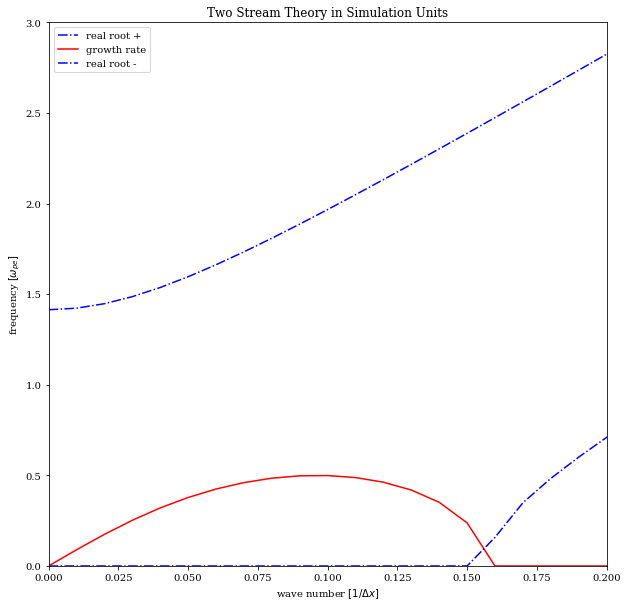

In [2]:
# first let's define the k-axis

karray=np.arange(0,1,0.01)
nk=karray.shape[0]

##################################################################
##################################################################
#
# here are the parameters of this simulation:
# now let's enter the parameters of the problem we are interested:
#
##################################################################
##################################################################
omegap=1.0
v0=9



omega_plus=np.zeros(karray.shape[0])
omega_minus_r=np.zeros(karray.shape[0])
omega_minus_i=np.zeros(karray.shape[0])




for i in range(0,nk):
    alpha=v0*karray[i]/omegap
    omega_plus[i]=omegap*np.sqrt(1+alpha*alpha+np.sqrt(1+4*alpha*alpha))
    omega_minus_r[i]=osiris.tstream_root_minus_r(karray[i],v0,omegap)
    omega_minus_i[i]=osiris.tstream_root_minus_i(karray[i],v0,omegap)

plt.figure(figsize=(10,10))
plt.plot(karray,omega_plus,'b-.',label = 'real root +')
plt.plot(karray,omega_minus_i,'r',label = 'growth rate')
plt.plot(karray,omega_minus_r,'b-.',label = 'real root - ')
plt.xlabel('wave number $[1/\Delta x]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('Two Stream Theory in Simulation Units')
plt.xlim((0,0.2))
plt.ylim((0,3))
plt.legend()
plt.show()

## Here we run the simulation:

In [2]:
dirname = 'twostream-2'
osiris.run_upic_es(rundir=dirname,inputfile='2stream-2.txt')

combine_h5_2d completed normally
runbeps completed normally


## Run the cell below to look at the time history of the various modes in the simulation, you can observe that the signal occurs near the modes where instability is predicted.



/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


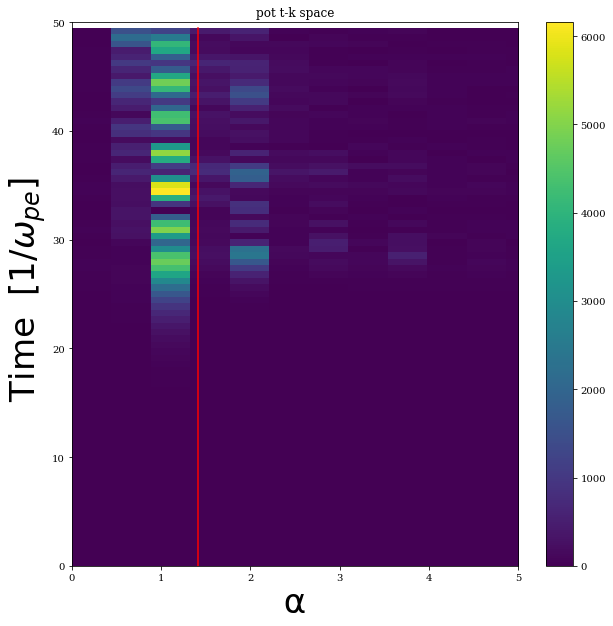

In [4]:
dirname = 'twostream-2'


osiris.plot_tk_2stream(dirname,'pot',klim=5,tlim=50,v0=9)

The cell above shows the time history of the ES electric fields as a function of time.  The red line indicates where the growth would end in mode number, i.e., $\alpha = \sqrt{2}$.  So here are some questions:
    

-  Do the simulation results agree with theory?
    
-  What are the sources of the noise for signals whose wavenumber to the right of the red line?
    
    

## Here we look at the mode histories in greater detail, and compare the simulation data against theory.  

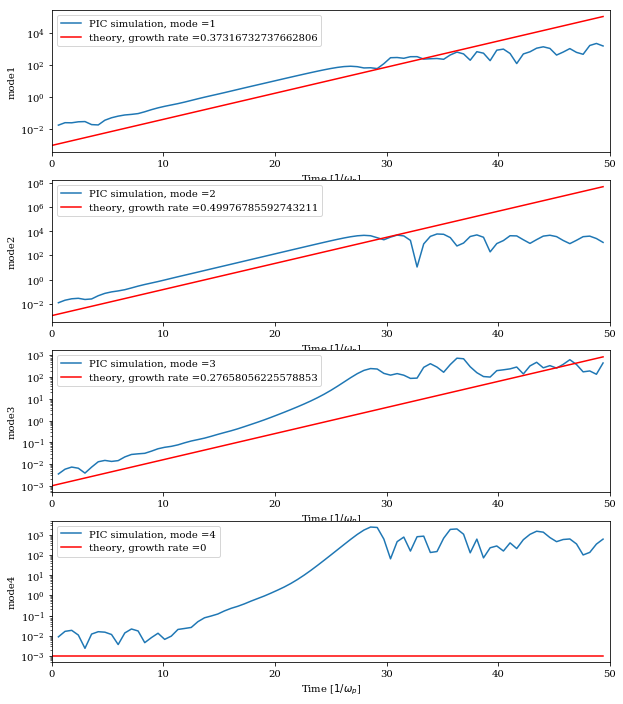

In [22]:


###  Here we compare results against theory
dirname = 'twostream-2'


osiris.plot_tk_2stream_theory(dirname,'pot',modemin=1,modemax=4,tlim=50,v0=9,init_amplitude=1e-3)




## Here is the evolution of the electrostatic potential in real space.

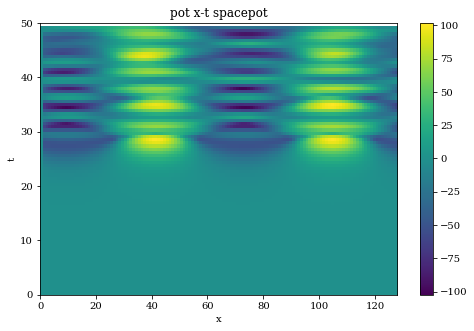

In [6]:
dirname = 'twostream-2'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,50],xlim=[0,128])

## Here is the evolution of the phase space.  

In [7]:
# Here you can see the evolution of phase space

dirname='twostream-2'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=6, description='n', max=12), Output()), _dom_classes=('widget-interact',))

### Case 1b, $V_0 = +/- 9$, no thermal fluctuations:

The instabilities takes thermal fluctuations from the beams and amplify them.  To demonstrate this, we will run a simulation with no thermal velocity, in this case, the fluctuation level is exactly 0 in the beginning, and the instability will stay "linear" for much longer.  The simulation is identical to the first case, except:

*  Initial thermal velocity is 0 

*  Double the Particle Number

*  Length of the simulation is extended from 50 $\omega_p^{-1}$ to 80 $\omega_p^{-1}$



In [12]:
dirname = 'twostream-quiet'
osiris.run_upic_es(rundir=dirname,inputfile='2stream-quiet.txt')

combine_h5_2d completed normally
runbeps completed normally


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


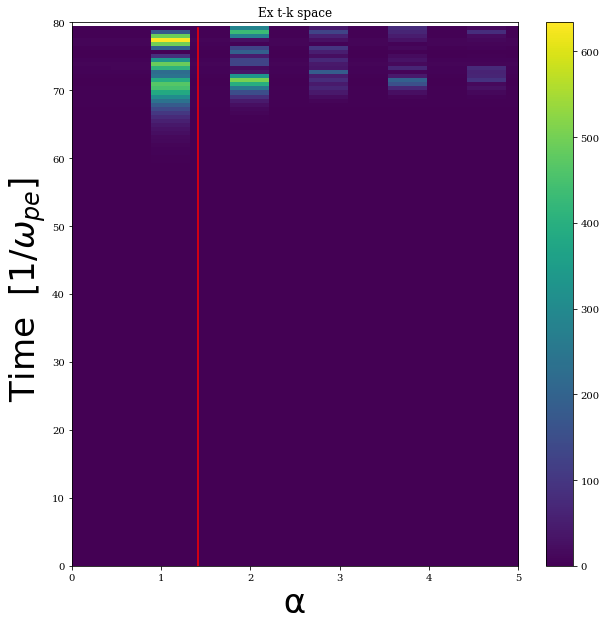

In [13]:
dirname = 'twostream-quiet'

osiris.plot_tk_2stream(dirname,'Ex',klim=5,tlim=80,v0=9)

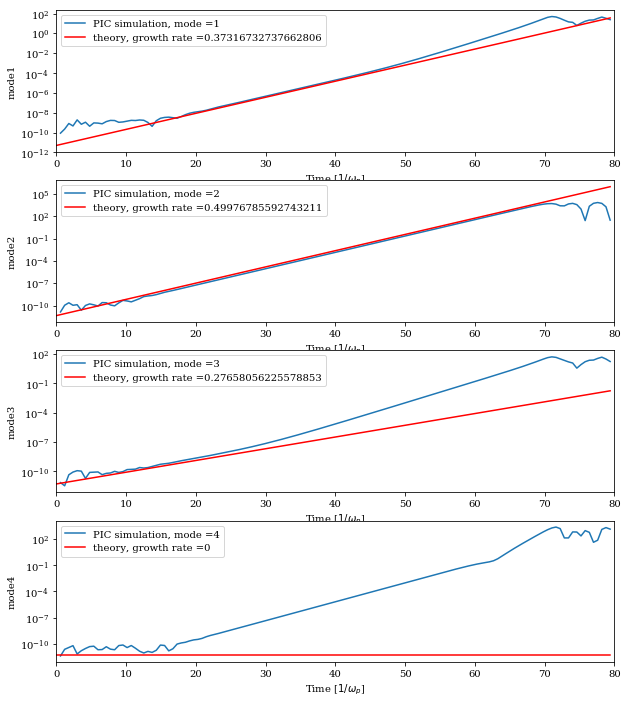

In [23]:
###  Here we compare results against theory
dirname = 'twostream-quiet'


osiris.plot_tk_2stream_theory(dirname,'pot',modemin=1,modemax=4,tlim=80,v0=9,init_amplitude=5e-12)


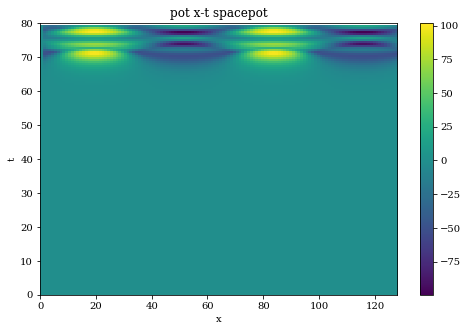

In [21]:
dirname = 'twostream-quiet'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,80],xlim=[0,128])

In [20]:
# Here you can see the evolution of phase space

dirname='twostream-quiet'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=9, description='n', max=19), Output()), _dom_classes=('widget-interact',))


## Case 2:  $V_0=+/- 5 \Delta x \omega_{pe}$

To increase the number of unstable modes with UPIC, there are two ways to go.   One way is to increase the system length, this will improve the resolution in $\hat{k}$ space and increase the number of unstable modes within the same interval.  Another way to go is to decrease the drift velocity, because the instability occurs within the range of $0 < \alpha\equiv k v_0/\omega_P < \sqrt{2}$, decreasing $v_0$ will increase the number of unstable modes in the same range of $\hat{k}$.  

In the previous simulation, modes 1 to mode 3 are unstable.  In this case, we double the size of the simulation and reduce the drift velocity by a factor of 1.8  (from 9 to 5).  So in this case, modes 1 to mode 11 are unstable w.r.t. the 2 stream instability.  In this example, we will see how well the simulation agrees with theory when there are a large number of unstable modes.




### Here are the roots to the dispersion relation here:  

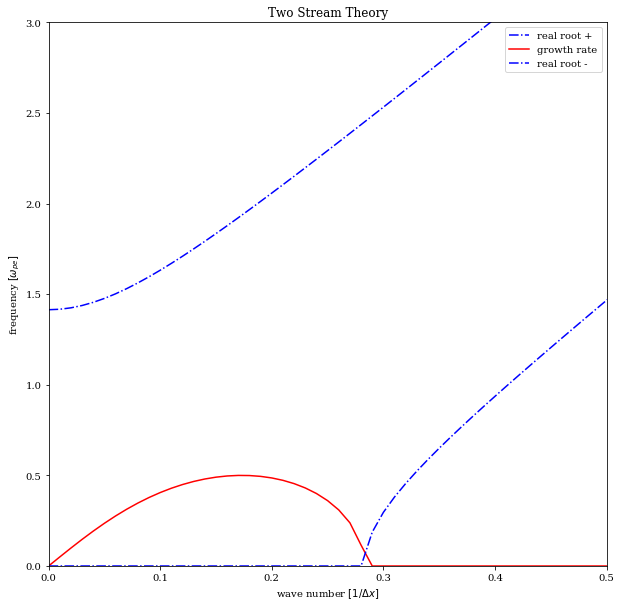

In [25]:
karray=np.arange(0,1,0.01)
nk=karray.shape[0]
omegap=1.0
v0=5.0

omega_plus=np.zeros(karray.shape[0])
omega_minus_r=np.zeros(karray.shape[0])
omega_minus_i=np.zeros(karray.shape[0])

for i in range(0,nk):
    alpha=v0*karray[i]/omegap
    omega_plus[i]=omegap*np.sqrt(1+alpha*alpha+np.sqrt(1+4*alpha*alpha))
    if alpha > np.sqrt(2): 
        omega_minus_r[i]= omegap*np.sqrt(1+alpha*alpha-np.sqrt(1+4*alpha*alpha))
        omega_minus_i[i]=0.0
    else:
        omega_minus_i[i] = omegap*np.sqrt(np.sqrt(1+4*alpha*alpha)-1-alpha*alpha)
        omega_minus_r[i] = 0.0
plt.figure(figsize=(10,10))
plt.plot(karray,omega_plus,'b-.',label = 'real root +')
plt.plot(karray,omega_minus_i,'r',label = 'growth rate')
plt.plot(karray,omega_minus_r,'b-.',label = 'real root - ')
plt.xlabel('wave number $[1/\Delta x]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('Two Stream Theory')
plt.xlim((0,0.5))
plt.ylim((0,3))
plt.legend()
plt.show()

###  Final Case:  $V_0 = +/- 5 \ \ [\Delta x \ \ \omega_{pe}]$

In [2]:
dirname = 'twostream'
osiris.run_upic_es(rundir=dirname,inputfile='2stream.txt')

combine_h5_2d completed normally
runbeps completed normally


###### Below is the simulation results from the two stream case.


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


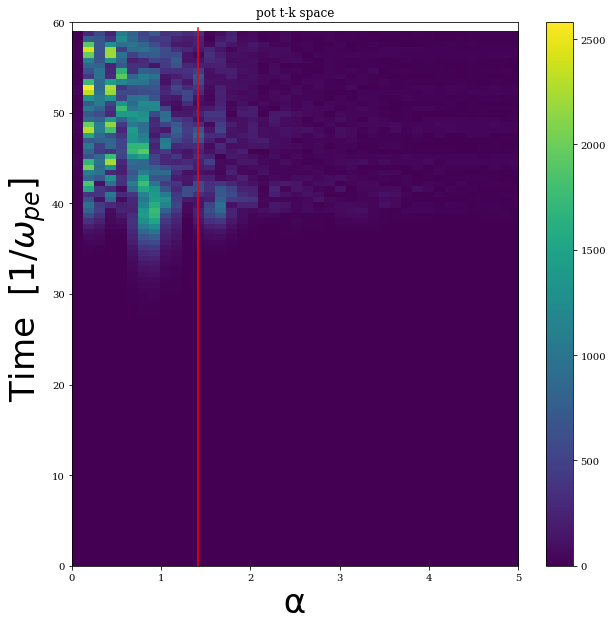

In [5]:
dirname = 'twostream'


osiris.plot_tk_2stream(dirname,'pot',klim=5,tlim=60,v0=5)

## Here you can look at the mode history mode by mode, the most unstable mode is mode 7, and the agreement is good between modes 3 through 10.

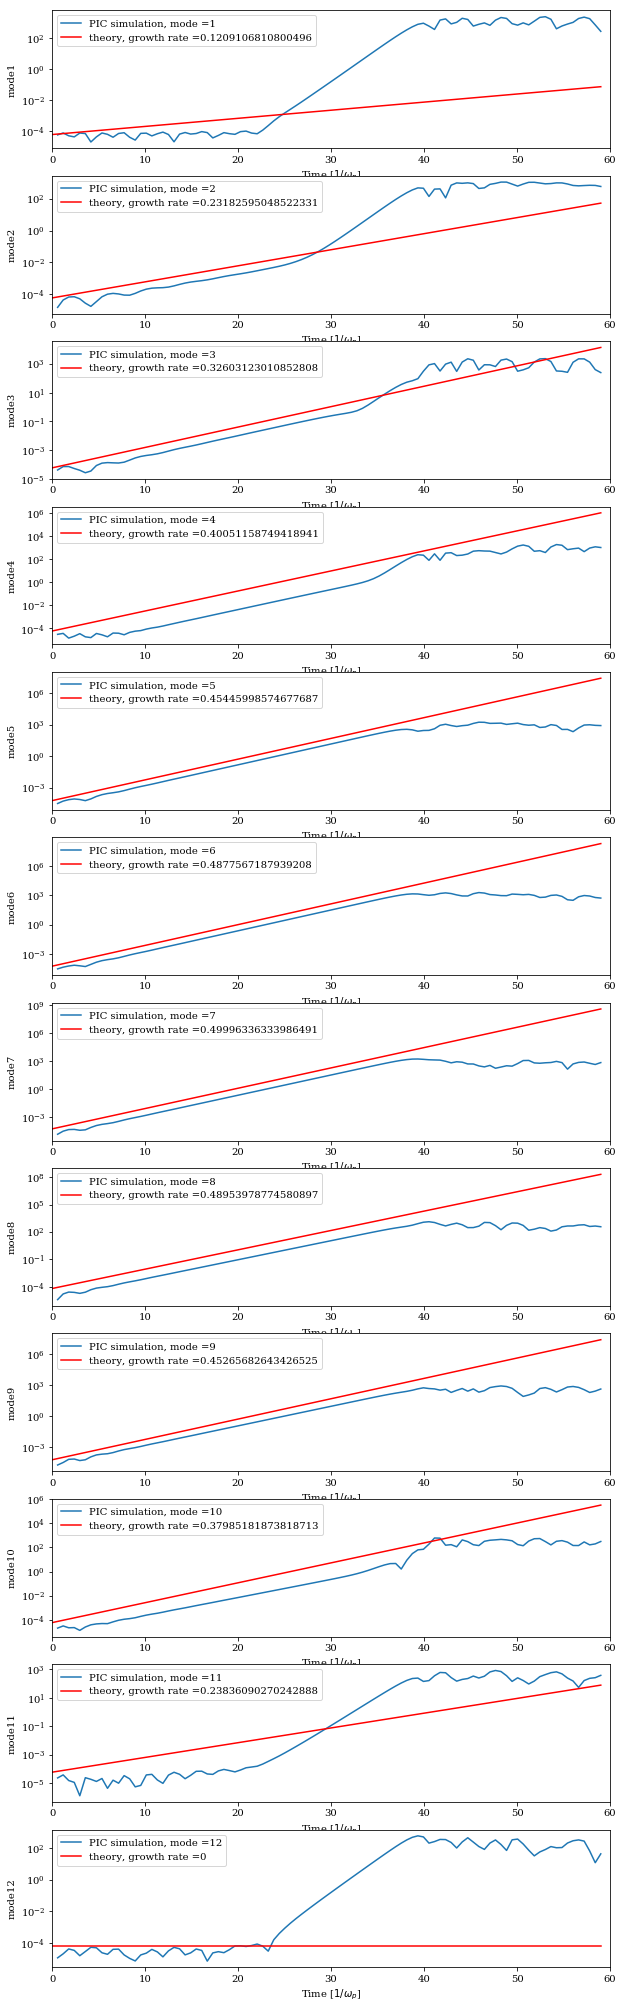

In [9]:
###  Here we compare results against theory
dirname = 'twostream'


osiris.plot_tk_2stream_theory(dirname,'pot',modemin=1,modemax=12,tlim=60,v0=5,init_amplitude=6e-5)


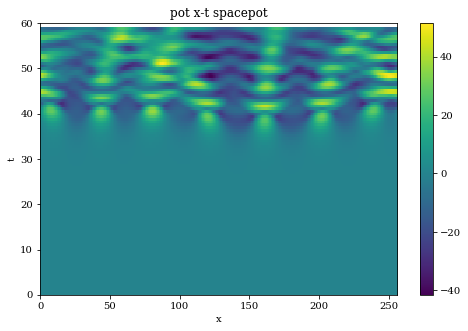

In [12]:
dirname = 'twostream'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,60])

In [13]:
# Here you can see the evolution of phase space

dirname='twostream'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=7, description='n', max=14), Output()), _dom_classes=('widget-interact',))

##  The above notebook gives some examples of the 2-stream instability.  To explore the instability further, we suggest that you try the following:

*  Change the simulation box size to change the resolution in $\hat{k}$
*  Change the beam velocity (VX0 and VDX in the input deck)
*  Make the simulation time (TEND) longer to look at the nonlinear stages of the instability